<a href="https://colab.research.google.com/github/esapratama/ALGORITMA-DAN-STRUKTUR-DATA/blob/main/Week5_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

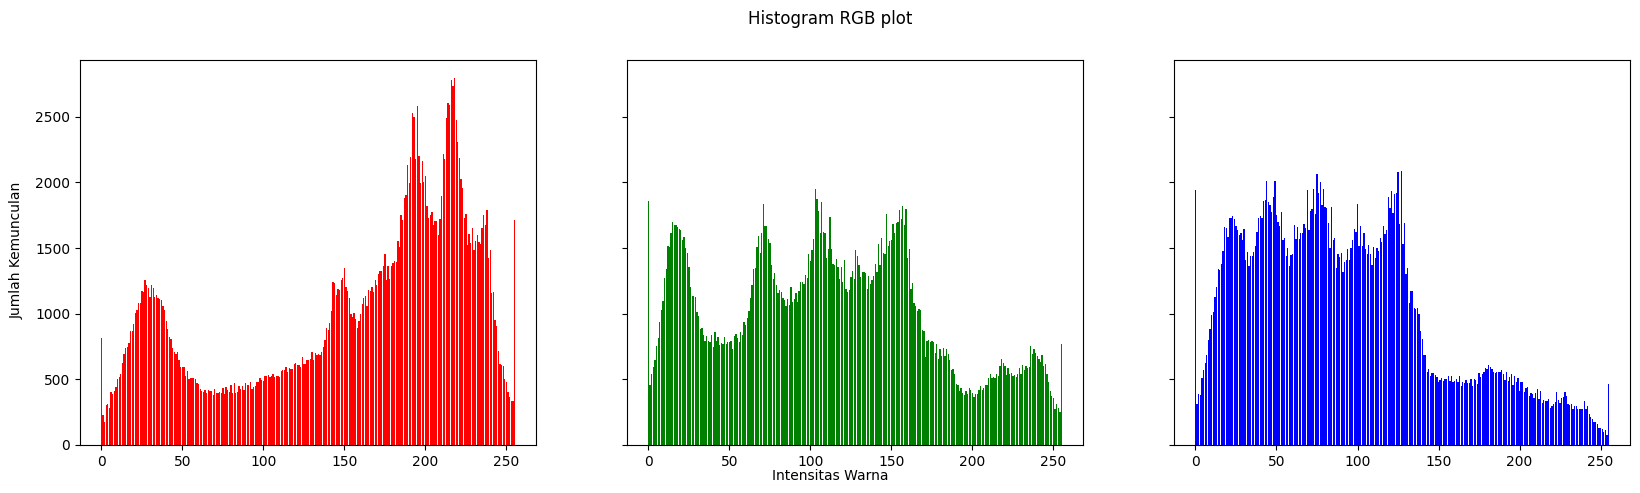

In [25]:
# membuat histogram image (manual)

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
    for x in range(0, width):
        red[img[y][x][0]] += 1
        green[img[y][x][1]] += 1
        blue[img[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

<BarContainer object of 256 artists>

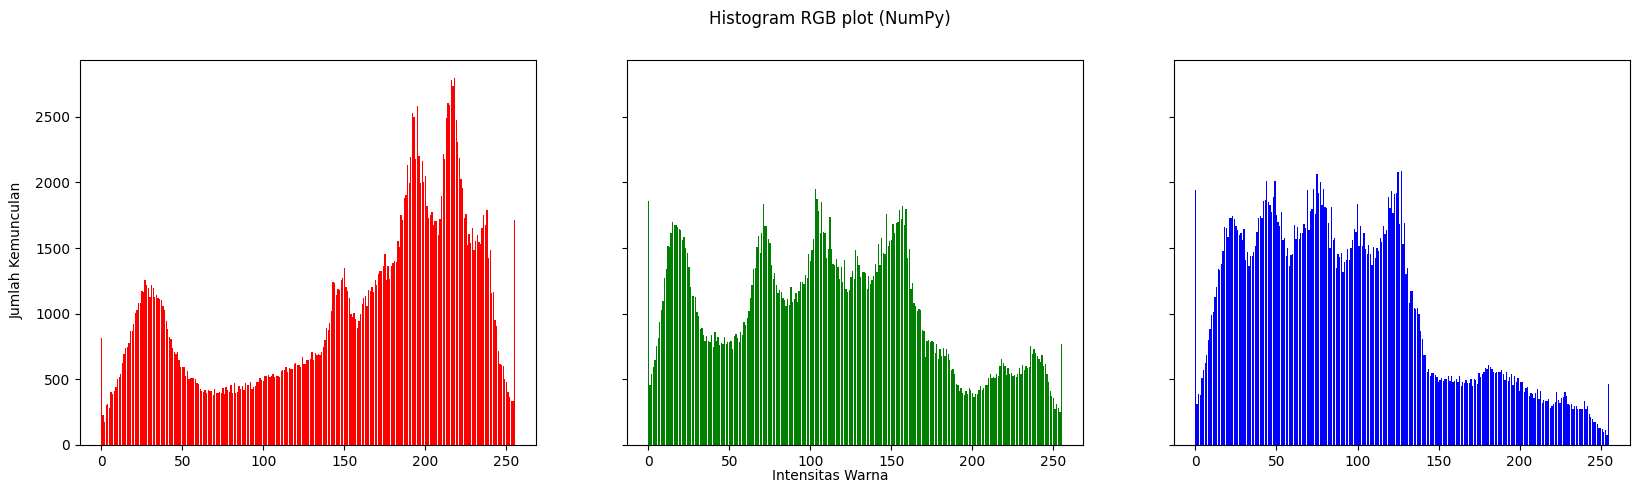

In [26]:
#Pertanyaan Praktikum D1
#Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
#NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r = img[:,:,0].flatten()
g = img[:,:,1].flatten()
b = img[:,:,2].flatten()

hist_r, bins_r = np.histogram(r, bins=256, range=[0,256])
hist_g, bins_g = np.histogram(g, bins=256, range=[0,256])
hist_b, bins_b = np.histogram(b, bins=256, range=[0,256])

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot (NumPy)')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')

axs[0].bar(names, hist_r, color='red')
axs[1].bar(names, hist_g, color='green')
axs[2].bar(names, hist_b, color='blue')

penjelasan soal 1
hasilnya sama, arena keduanya menhitung jumlah pixel berdasarkan intensitas warna yang sama. untuk perbedaan ada di cara menghitung, manual lebih lama, dan NumPy lebih cepat.

/tmp/ipython-input-2248194912.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_gray.ravel(), 256, [0,256], color='black')


Text(0, 0.5, 'Jumlah Pixel')

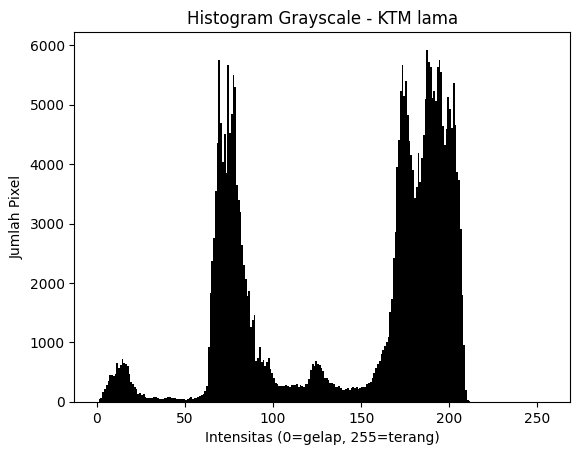

In [27]:
# Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
# Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
# gelap, terang, atau kontras rendah.

img = cv.imread('/content/drive/MyDrive/PCVK/KTM.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.hist(img_gray.ravel(), 256, [0,256], color='black')
plt.title("Histogram Grayscale - KTM lama")
plt.xlabel("Intensitas (0=gelap, 255=terang)")
plt.ylabel("Jumlah Pixel")


/tmp/ipython-input-4221160798.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-4221160798.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)


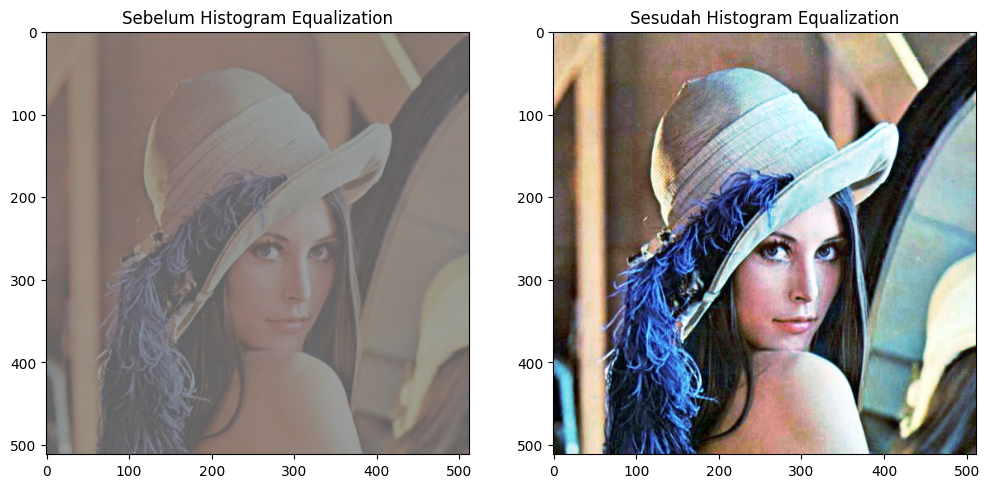

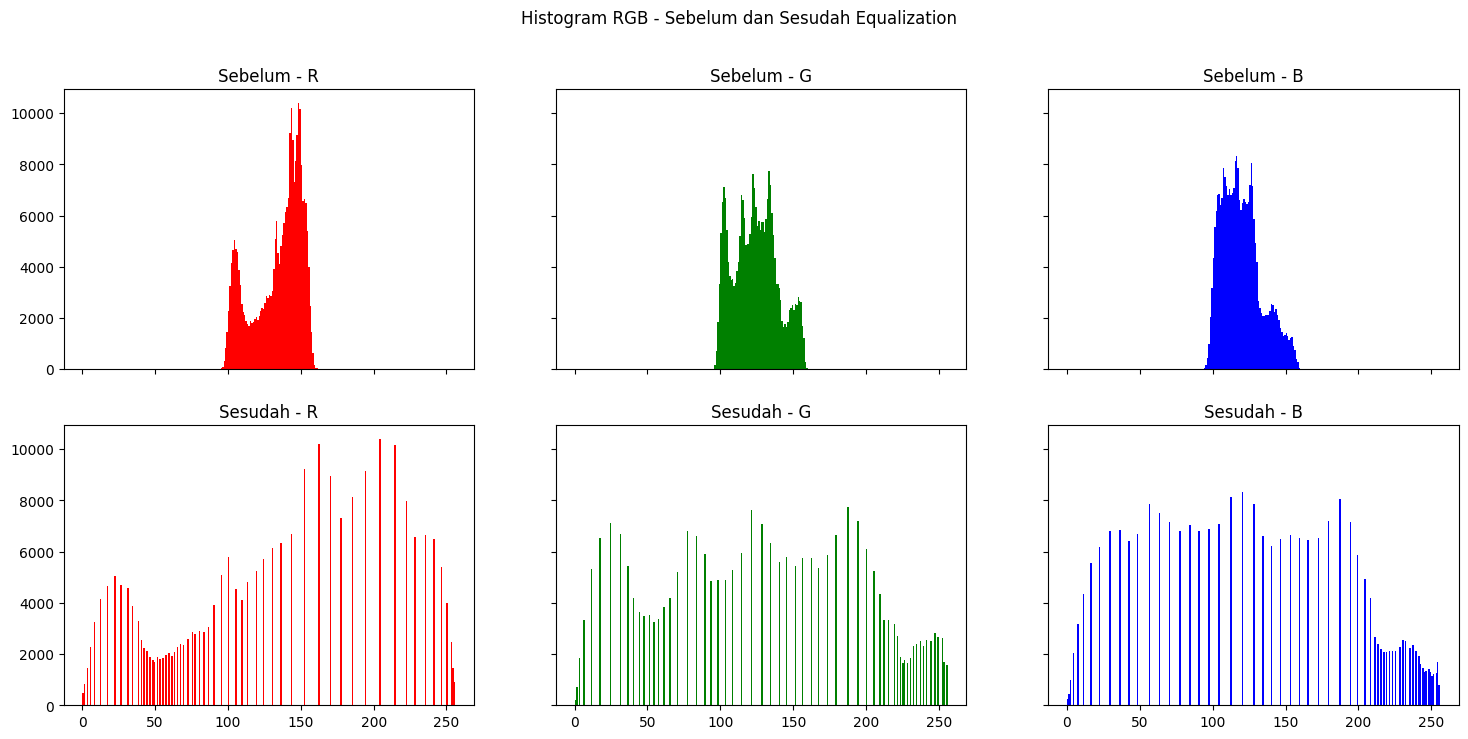

In [12]:
#D-2 PERCOBAAN HISTOGRAM EQUALIZATION

img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

img_eq = cv.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Sebelum Histogram Equalization")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Sesudah Histogram Equalization")

colors = ('r','g','b')
channels_before = [r, g, b]
channels_after  = [r_eq, g_eq, b_eq]

fig, axs = plt.subplots(2, 3, figsize=(18,8), sharex=True, sharey=True)
fig.suptitle("Histogram RGB - Sebelum dan Sesudah Equalization")

for i, col in enumerate(colors):
    axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
    axs[0, i].set_title(f"Sebelum - {col.upper()}")

for i, col in enumerate(colors):
    axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)
    axs[1, i].set_title(f"Sesudah - {col.upper()}")



/tmp/ipython-input-2288748765.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-2288748765.py:37: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)


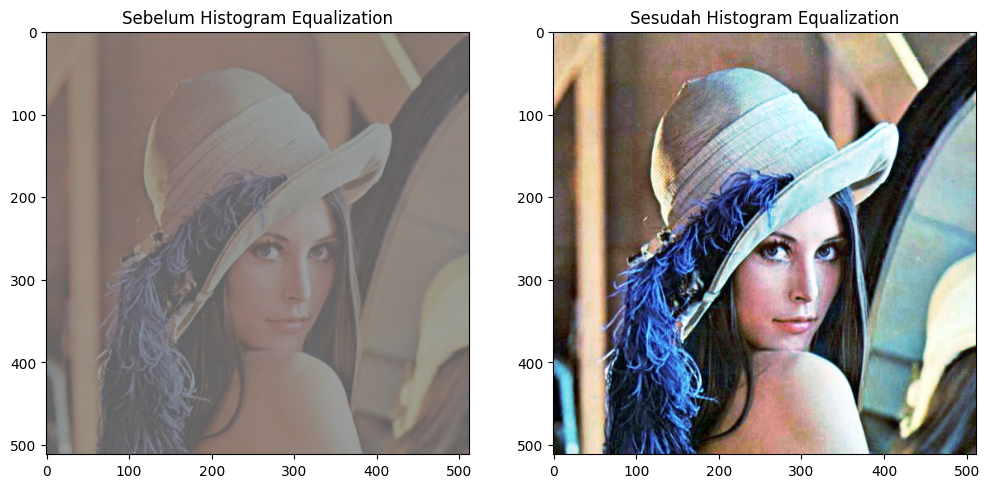

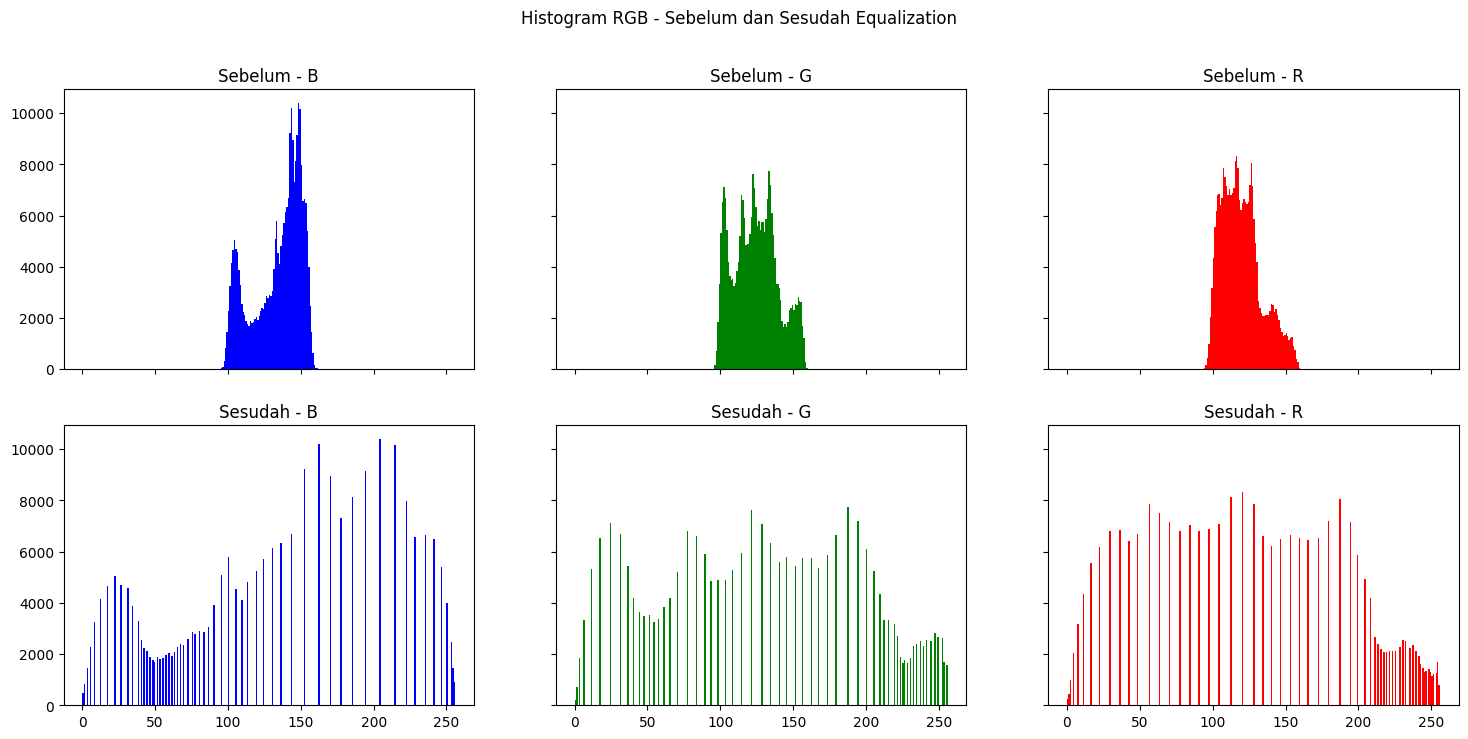

In [13]:
# Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
# menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”

img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

b, g, r = cv.split(img)

b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

img_eq = cv.merge((b_eq, g_eq, r_eq))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Sebelum Histogram Equalization")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Sesudah Histogram Equalization")
# plt.show()

colors = ('b','g','r')
channels_before = [b, g, r]
channels_after  = [b_eq, g_eq, r_eq]

fig, axs = plt.subplots(2, 3, figsize=(18,8), sharex=True, sharey=True)
fig.suptitle("Histogram RGB - Sebelum dan Sesudah Equalization")

for i, col in enumerate(colors):
    axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
    axs[0, i].set_title(f"Sebelum - {col.upper()}")

for i, col in enumerate(colors):
    axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)
    axs[1, i].set_title(f"Sesudah - {col.upper()}")

hasil dari kedua ouput sama,karena menggunakan cv2.equalizeHlist(), di langkah 1 cara implementasi rgb masih manual, dan langkah 2 menggunaka fungsi cv.equalizeHist()

/tmp/ipython-input-3271426258.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-3271426258.py:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)


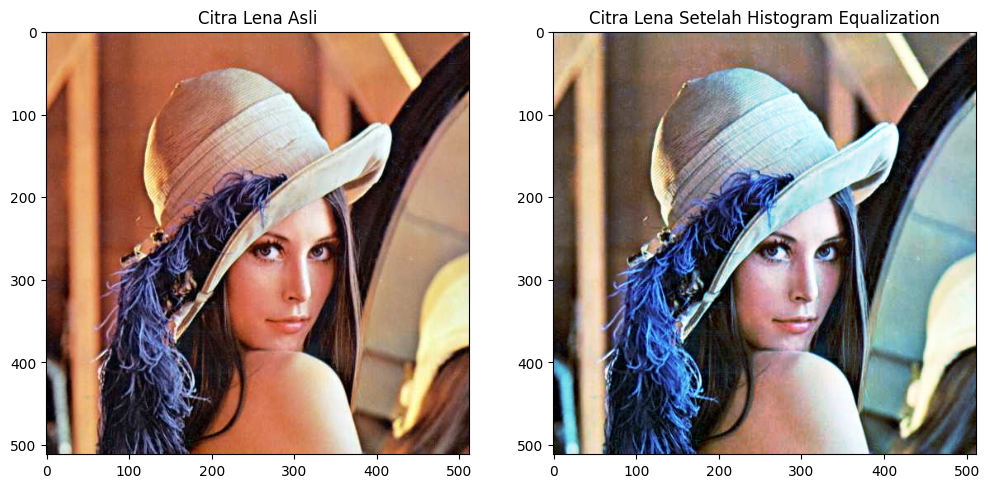

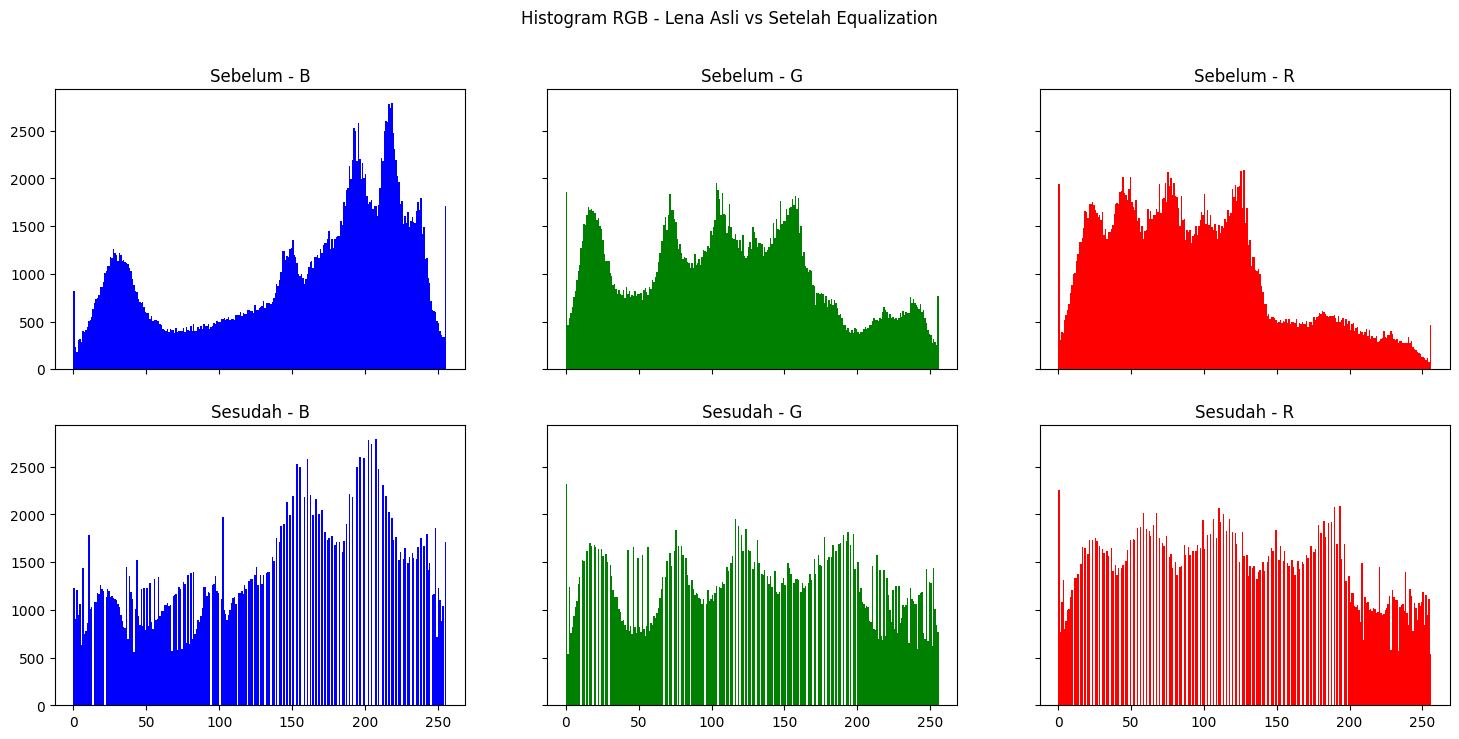

In [14]:
#PERTANYAAN PRAKTIKUM D2
#1. Perbandingan Citra Lena
#Gunakan hasil histogram equalization pada citra lena.jpg.


img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

b, g, r = cv.split(img)

b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)

img_eq = cv.merge((b_eq, g_eq, r_eq))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Lena Asli")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Citra Lena Setelah Histogram Equalization")
# plt.show()

colors = ('b','g','r')
channels_before = [b, g, r]
channels_after  = [b_eq, g_eq, r_eq]

fig, axs = plt.subplots(2, 3, figsize=(18,8), sharex=True, sharey=True)
fig.suptitle("Histogram RGB - Lena Asli vs Setelah Equalization")

for i, col in enumerate(colors):
    axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
    axs[0, i].set_title(f"Sebelum - {col.upper()}")

for i, col in enumerate(colors):
    axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)
    axs[1, i].set_title(f"Sesudah - {col.upper()}")

In [15]:
#Hitung nilai PSNR antara citra asli dan citra hasil equalization.

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

b, g, r = cv.split(img)
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)
img_eq = cv.merge((b_eq, g_eq, r_eq))

mse = np.mean((img.astype(np.float64) - img_eq.astype(np.float64)) ** 2)

if mse == 0:
    psnr = float('inf')
else:
    psnr = 10 * np.log10((255 ** 2) / mse)

print(f"Nilai MSE: {mse}")
print(f"Nilai PSNR: {psnr} dB")

Nilai MSE: 1042.8941040039062
Nilai PSNR: 17.948401486845306 dB


c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas visual citra? Apakah ada detail baru yang muncul setelah equalization?

1. hasil nila psnr rendah karena <30 DB
2. psnr rendah, citra hasil equalization cukup berbeda, dan tujuan equalization untuk meningkatkan kontras
3. ya, histogram equalization menyebarkan piksel secara merata



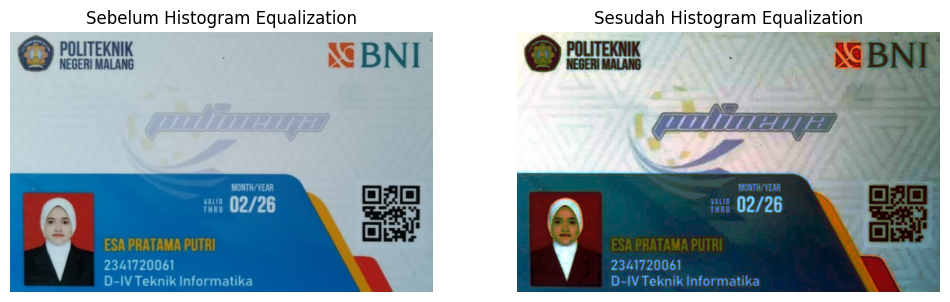

/tmp/ipython-input-3953424692.py:35: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
/tmp/ipython-input-3953424692.py:39: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)


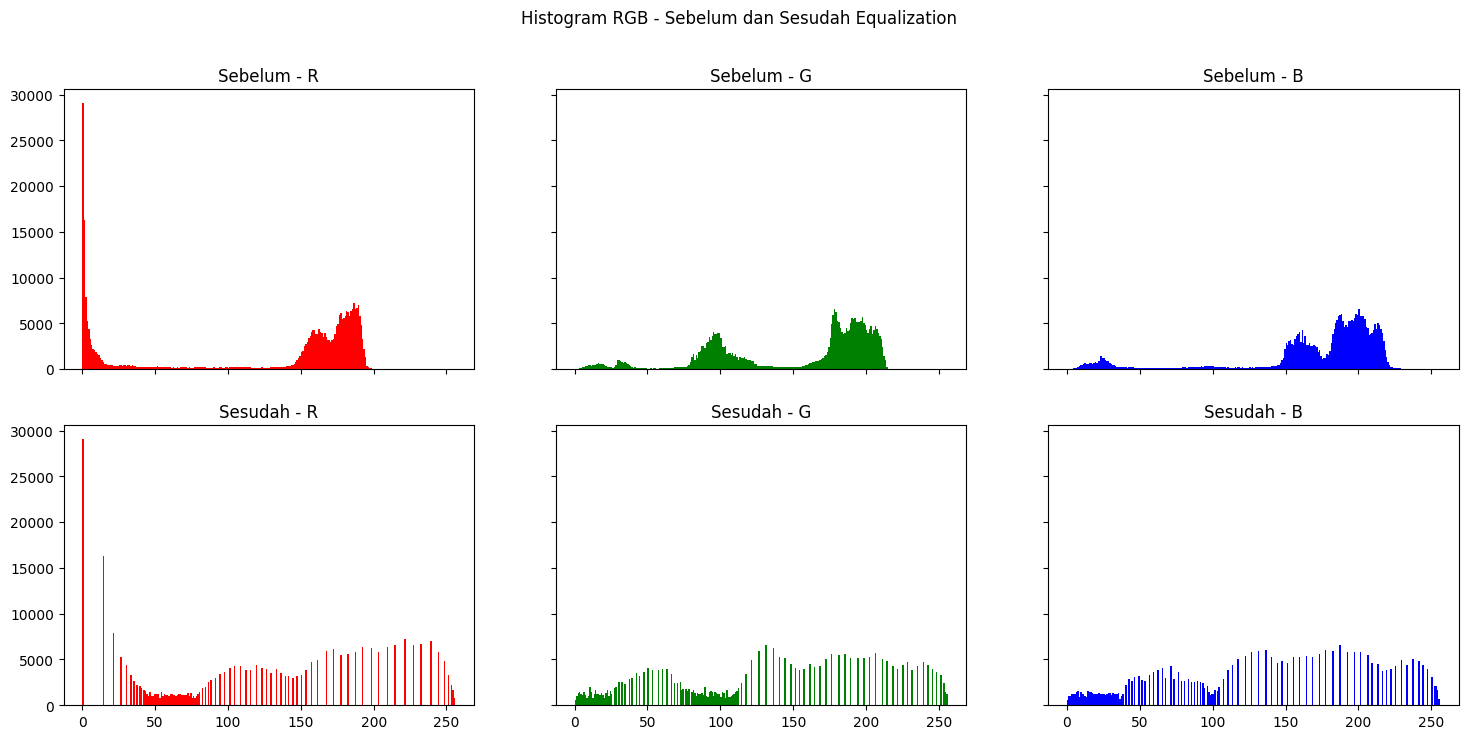

In [32]:
#2. Gunakan Citra KTM Lama.jpg
#Terapkan histogram equalization pada citra KTM lama.jpg.

img = cv.imread('/content/drive/MyDrive/PCVK/KTM.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

img_eq = cv.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Sebelum Histogram Equalization")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_eq)
plt.title("Sesudah Histogram Equalization")
plt.axis("off")
plt.show()

colors = ('r','g','b')
channels_before = [r, g, b]
channels_after  = [r_eq, g_eq, b_eq]

fig, axs = plt.subplots(2, 3, figsize=(18,8), sharex=True, sharey=True)
fig.suptitle("Histogram RGB - Sebelum dan Sesudah Equalization")

for i, col in enumerate(colors):
    axs[0, i].hist(channels_before[i].ravel(), 256, [0,256], color=col)
    axs[0, i].set_title(f"Sebelum - {col.upper()}")

for i, col in enumerate(colors):
    axs[1, i].hist(channels_after[i].ravel(), 256, [0,256], color=col)
    axs[1, i].set_title(f"Sesudah - {col.upper()}")

/tmp/ipython-input-1269718157.py:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1,0].hist(img[:,:,i].ravel(), 256, [0,256], color=col, alpha=0.7)
/tmp/ipython-input-1269718157.py:33: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axs[1,1].hist(img_eq[:,:,i].ravel(), 256, [0,256], color=col, alpha=0.7)


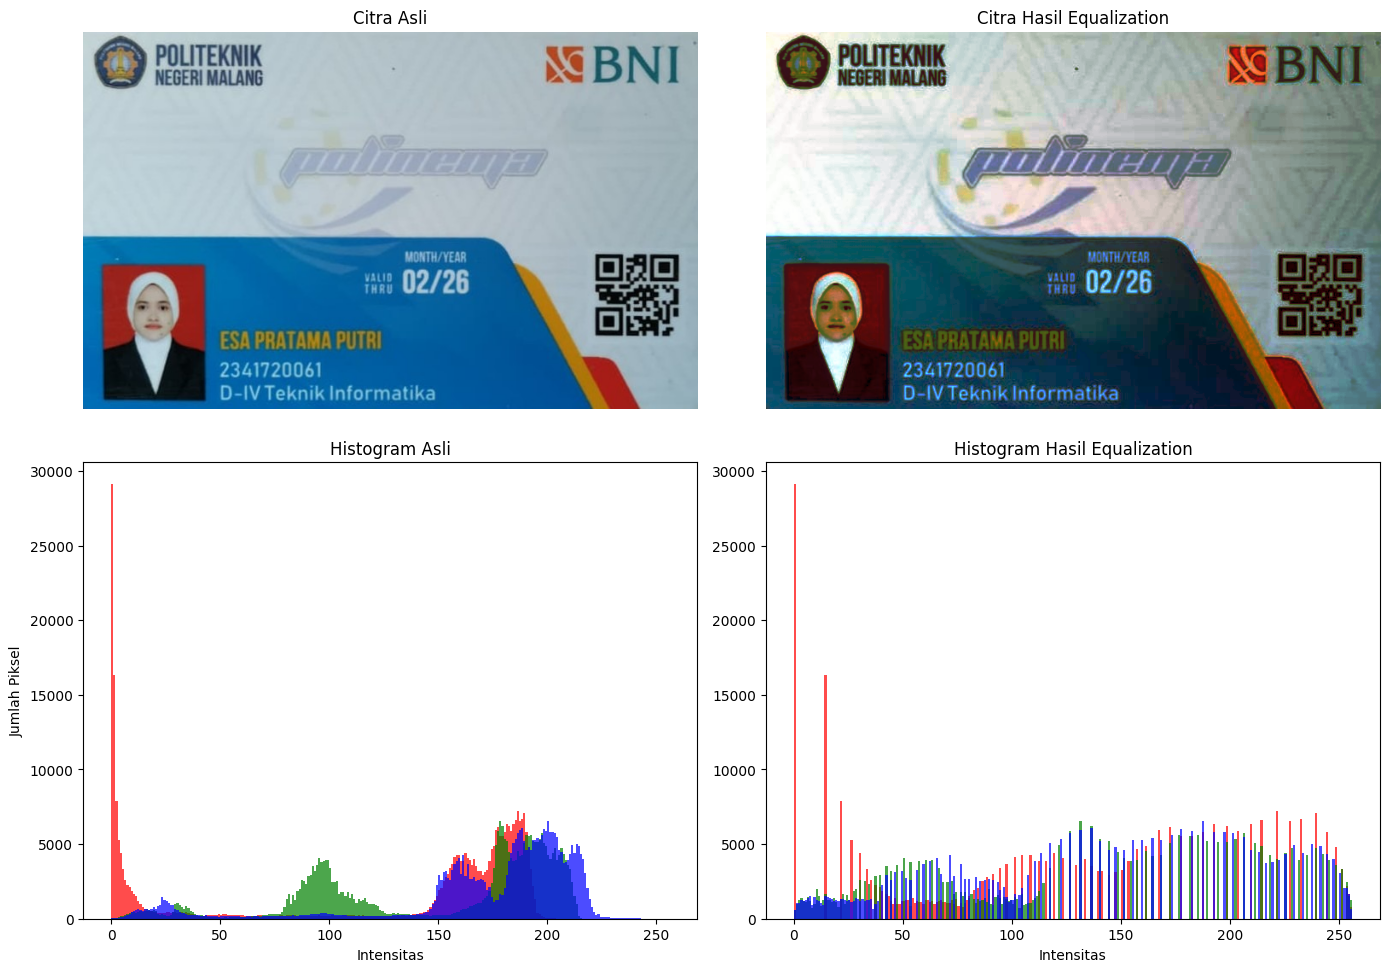

In [33]:
#Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
#dalam satu layout.

img = cv.imread('/content/drive/MyDrive/PCVK/KTM.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

r, g, b = cv.split(img)

r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
img_eq = cv.merge((r_eq, g_eq, b_eq))

fig, axs = plt.subplots(2, 2, figsize=(14,10))

axs[0,0].imshow(img)
axs[0,0].set_title("Citra Asli")
axs[0,0].axis("off")

axs[0,1].imshow(img_eq)
axs[0,1].set_title("Citra Hasil Equalization")
axs[0,1].axis("off")

colors = ('r','g','b')

for i, col in enumerate(colors):
    axs[1,0].hist(img[:,:,i].ravel(), 256, [0,256], color=col, alpha=0.7)
axs[1,0].set_title("Histogram Asli")
axs[1,0].set_xlabel("Intensitas")
axs[1,0].set_ylabel("Jumlah Piksel")

for i, col in enumerate(colors):
    axs[1,1].hist(img_eq[:,:,i].ravel(), 256, [0,256], color=col, alpha=0.7)
axs[1,1].set_title("Histogram Hasil Equalization")
axs[1,1].set_xlabel("Intensitas")

plt.tight_layout()
# plt.show()

c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization. Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah, teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

- perbandingan citra asli warna terlihat pucat, detail bagian wajah dan latar belakang terlalu cerah. citra hasil histogram, warna lebih kontras, detail area wajah terlihat, histogram tersebar merata
- ya, ada peningkatkan kulitas, karena detail sebelumnya terang



Text(0.5, 1.0, 'Citra Hasil Floyd–Steinberg (RGB Dithered)')

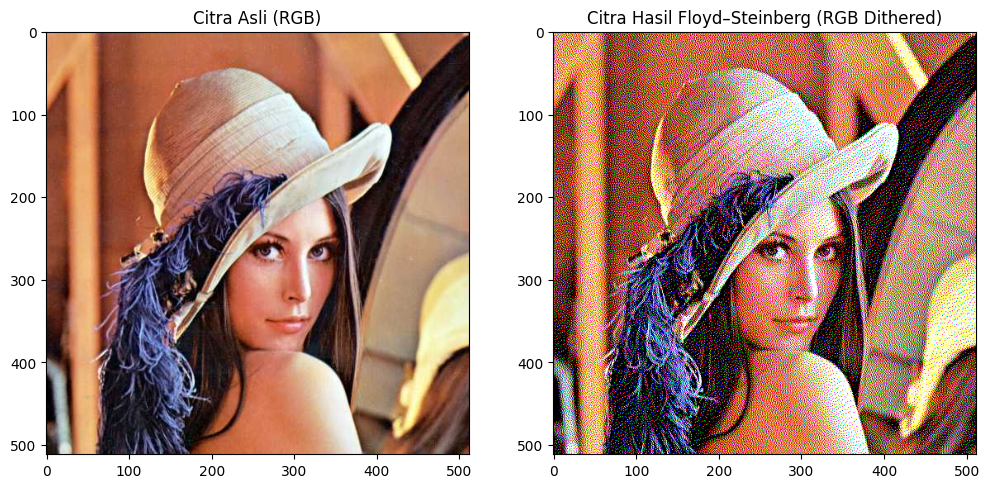

In [18]:
#D-3 TUGAS PRAKTIKUM DITHERING
# Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
# awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
# modul ini! (Gunakan gambar lena.jpg)


img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

h, w, c = img.shape
dithered = img.astype(float).copy()

for channel in range(3):  # R, G, B
    for y in range(h):
        for x in range(w):
            old_pixel = dithered[y, x, channel]
            new_pixel = 0 if old_pixel < 128 else 255
            dithered[y, x, channel] = new_pixel
            error = old_pixel - new_pixel

            if x+1 < w:
                dithered[y, x+1, channel] += error * 7/16
            if y+1 < h and x > 0:
                dithered[y+1, x-1, channel] += error * 3/16
            if y+1 < h:
                dithered[y+1, x, channel] += error * 5/16
            if y+1 < h and x+1 < w:
                dithered[y+1, x+1, channel] += error * 1/16

dithered = np.where(dithered < 128, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Citra Asli (RGB)")
#plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dithered)
plt.title("Citra Hasil Floyd–Steinberg (RGB Dithered)")
#plt.axis("off")

# plt.show()

/tmp/ipython-input-2096551887.py:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256], color='black')
/tmp/ipython-input-2096551887.py:49: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img_eq.ravel(), 256, [0,256], color='black')


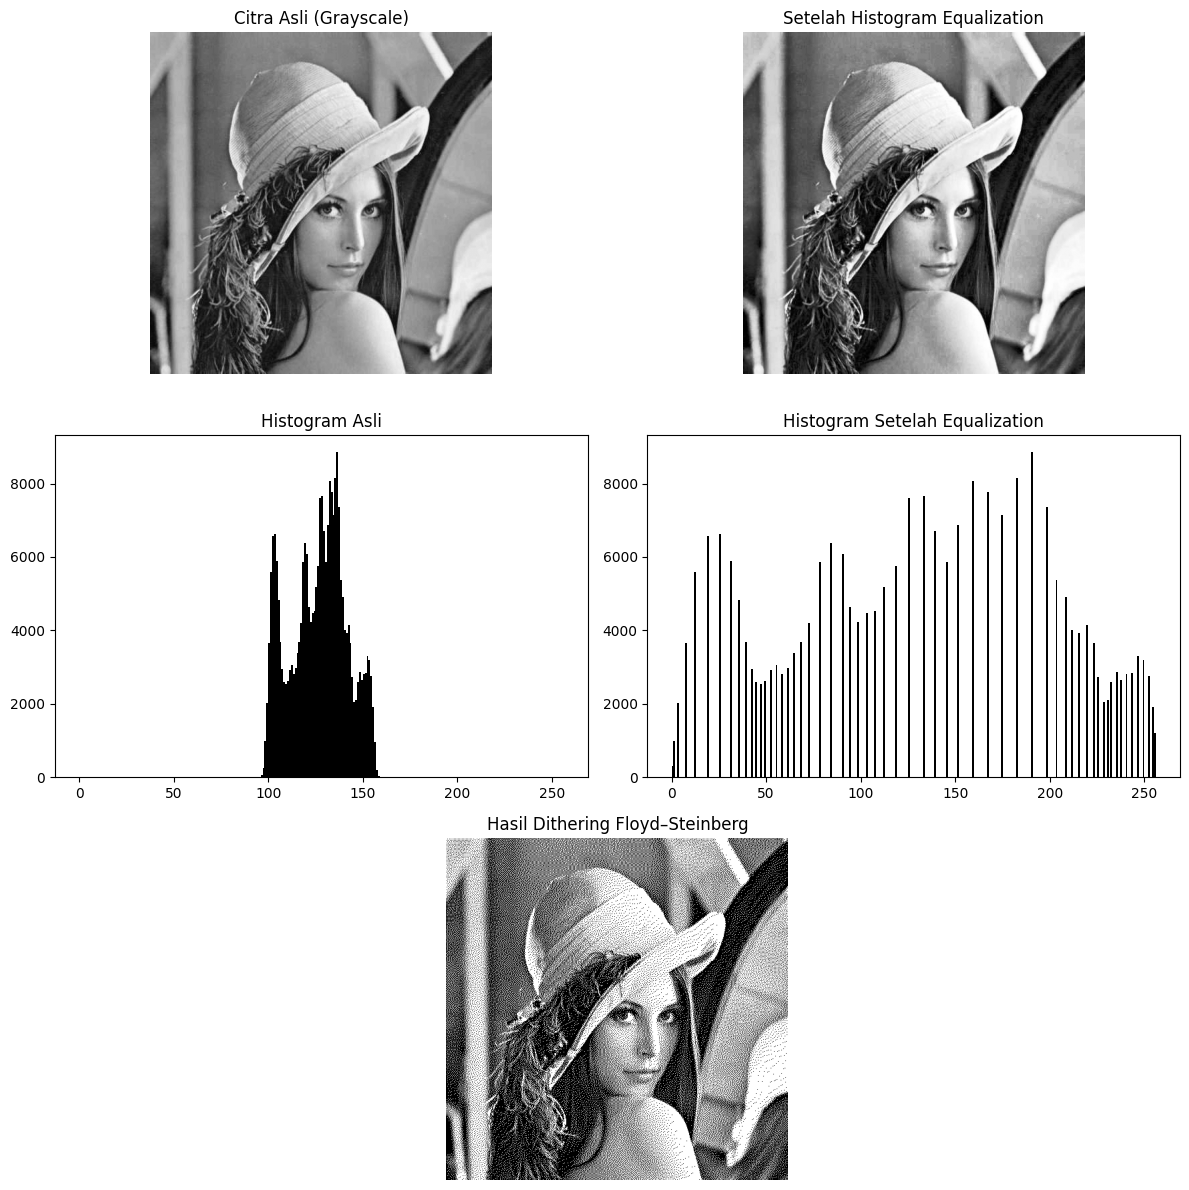

In [24]:
# Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
# equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
# histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
# menampilkan gambar di bawah ini!


img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

img_eq = cv.equalizeHist(img)

h, w = img_eq.shape
dithered = img_eq.astype(float).copy()

for y in range(h):
    for x in range(w):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x+1 < w:
            dithered[y, x+1] += error * 7/16
        if y+1 < h and x > 0:
            dithered[y+1, x-1] += error * 3/16
        if y+1 < h:
            dithered[y+1, x] += error * 5/16
        if y+1 < h and x+1 < w:
            dithered[y+1, x+1] += error * 1/16

dithered = np.where(dithered < 128, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,12))

plt.subplot(3,2,1)
plt.imshow(img, cmap='gray')
plt.title("Citra Asli (Grayscale)")
plt.axis("off")

plt.subplot(3,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title("Setelah Histogram Equalization")
plt.axis("off")

plt.subplot(3,2,3)
plt.hist(img.ravel(), 256, [0,256], color='black')
plt.title("Histogram Asli")

plt.subplot(3,2,4)
plt.hist(img_eq.ravel(), 256, [0,256], color='black')
plt.title("Histogram Setelah Equalization")

plt.subplot(3,1,3)
plt.imshow(dithered, cmap='gray')
plt.title("Hasil Dithering Floyd–Steinberg")
plt.axis("off")

plt.tight_layout()
# plt.show()

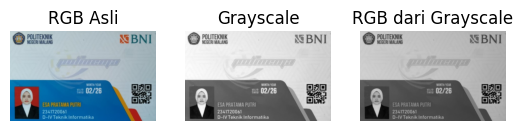

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Baca gambar RGB
img = cv2.imread("/content/drive/MyDrive/PCVK/KTM.jpg")      # gambar dibaca dalam format BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # ubah ke RGB agar sesuai

# --- Konversi RGB ke Grayscale manual ---
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

gray = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# --- Konversi Grayscale ke RGB manual ---
rgb_from_gray = np.zeros_like(img)
rgb_from_gray[:, :, 0] = gray
rgb_from_gray[:, :, 1] = gray
rgb_from_gray[:, :, 2] = gray

# Tampilkan hasil
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("RGB Asli")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(rgb_from_gray)
plt.title("RGB dari Grayscale")
plt.axis("off")

plt.show()

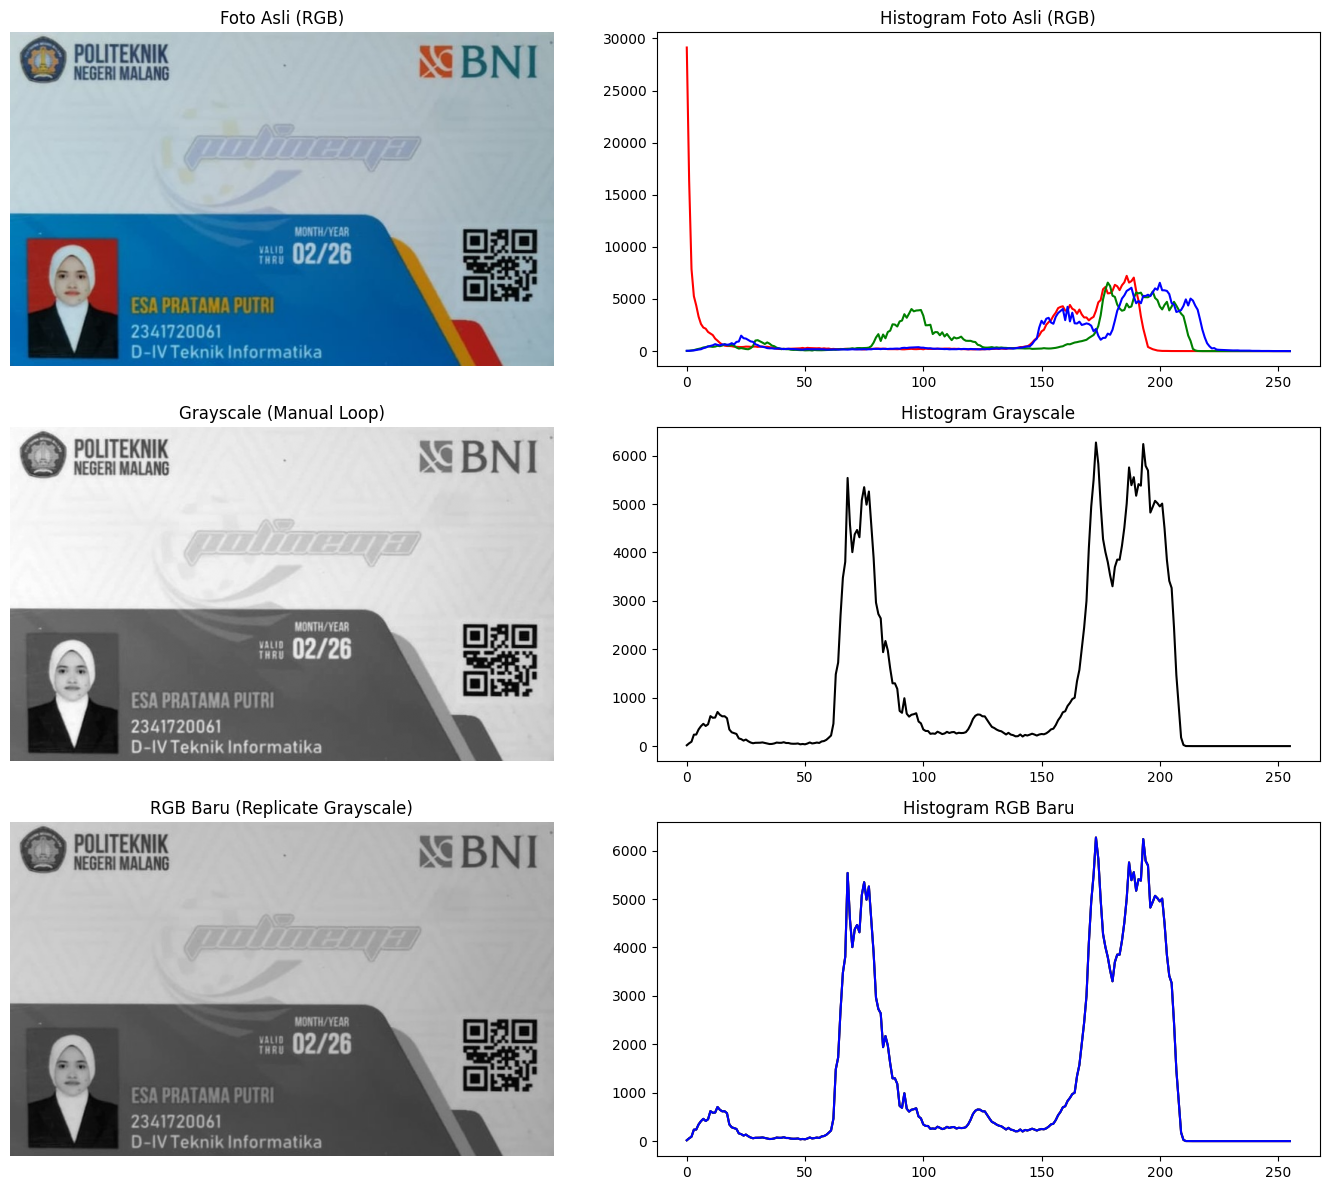

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/PCVK/KTM.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_grayscale = np.zeros((img_rgb.shape[0], img_rgb.shape[1]), dtype=np.uint8)
for i in range(img_rgb.shape[0]):
    for j in range(img_rgb.shape[1]):
        R = img_rgb[i, j, 0]
        G = img_rgb[i, j, 1]
        B = img_rgb[i, j, 2]
        gray_val = int(0.299 * R + 0.587 * G + 0.114 * B)
        img_grayscale[i, j] = gray_val
rgb_simple = np.stack((img_grayscale,)*3, axis=-1)

hist_r_orig, _ = np.histogram(img_rgb[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_orig, _ = np.histogram(img_rgb[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_orig, _ = np.histogram(img_rgb[:,:,2].ravel(), bins=256, range=[0,256])

hist_gray, _ = np.histogram(img_grayscale.ravel(), bins=256, range=[0,256])

hist_r_new, _ = np.histogram(rgb_simple[:,:,0].ravel(), bins=256, range=[0,256])
hist_g_new, _ = np.histogram(rgb_simple[:,:,1].ravel(), bins=256, range=[0,256])
hist_b_new, _ = np.histogram(rgb_simple[:,:,2].ravel(), bins=256, range=[0,256])

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

axes[0,0].imshow(img_rgb)
axes[0,0].set_title("Foto Asli (RGB)")
axes[0,0].axis("off")

axes[0,1].plot(hist_r_orig, color="red")
axes[0,1].plot(hist_g_orig, color="green")
axes[0,1].plot(hist_b_orig, color="blue")
axes[0,1].set_title("Histogram Foto Asli (RGB)")

axes[1,0].imshow(img_grayscale, cmap="gray")
axes[1,0].set_title("Grayscale (Manual Loop)")
axes[1,0].axis("off")

axes[1,1].plot(hist_gray, color="black")
axes[1,1].set_title("Histogram Grayscale")

axes[2,0].imshow(rgb_simple)
axes[2,0].set_title("RGB Baru (Replicate Grayscale)")
axes[2,0].axis("off")

axes[2,1].plot(hist_r_new, color="red")
axes[2,1].plot(hist_g_new, color="green")
axes[2,1].plot(hist_b_new, color="blue")
axes[2,1].set_title("Histogram RGB Baru")

plt.tight_layout()
plt.show()